In [14]:
#Prac 1 - Expert System
#!pip install python-aiml

import aiml
# Create a Kernel instance
kernel = aiml.Kernel()
# Load AIML files
kernel.learn("flu.aiml")
# Loop to interact with the expert system
print("Expert System for Identifying Flu Symptoms")
print("Type 'bye' to exit the conversation.")
while True:
    user_input = input("You: ")
    # Exit the conversation if the user types 'bye'
    if user_input.lower() == "bye":
        print("System: Goodbye! Stay healthy.")
        break
    # Get the system's response
    response = kernel.respond(user_input.upper())  
    # Print the system's response
    print(f"System: {response}") 
print("Prachi Mistry - 53004230021")


Loading flu.aiml...done (0.00 seconds)
Expert System for Identifying Flu Symptoms
Type 'bye' to exit the conversation.
You: WHAT ARE FLU SYMPTOMS
System: Flu symptoms usually include fever, chills, muscle aches, cough, congestion, runny nose, headaches, and fatigue.
You: IS FLU CONTAGIOUS
System: Yes, flu is highly contagious and can spread easily from person to person.
You: Bye
System: Goodbye! Stay healthy.
Prachi Mistry - 53004230021


In [ ]:
#flu.aiml (need to create as txt file)

<aiml version="1.0.1" encoding="UTF-8">
    <category>
        <pattern>WHAT ARE FLU SYMPTOMS</pattern>
        <template>
            Flu symptoms usually include fever, chills, muscle aches, cough, congestion, runny nose, headaches, and fatigue.
        </template>
    </category>
    <category>
        <pattern>I HAVE FEVER AND COUGH</pattern>
        <template>
            These symptoms could be associated with the flu. However, I recommend visiting a healthcare professional for an accurate diagnosis.
        </template>
    </category>
    <category>
        <pattern>IS FLU CONTAGIOUS</pattern>
        <template>
            Yes, flu is highly contagious and can spread easily from person to person.
        </template>
    </category>
    <category>
        <pattern>HOW CAN I PREVENT FLU</pattern>
        <template>
            The best way to prevent the flu is by getting a flu vaccine each year. Additionally, wash your hands frequently, avoid close contact with sick people, and maintain a healthy lifestyle.
        </template>
    </category>
    <category>
        <pattern>THANK YOU</pattern>
        <template>
            You're welcome! Take care and stay healthy.
        </template>
    </category>
    <category>
        <pattern>BYE</pattern>
        <template>
            Goodbye! Feel free to reach out if you have more questions.
        </template>
    </category>
    <category>
        <pattern>FLU*</pattern>
        <template>
            Could you please provide more details about your symptoms so that I can assist you better?
        </template>
    </category>
</aiml>

In [16]:
#Prac 2 - Bayes Theorem

import pandas as pd
def bayes_theorem(prior_A, likelihood_B_given_A, marginal_B):
    """
    Calculate the posterior probability using Bayes' Theorem.
    
    :param prior_A: P(A) - Prior probability of A
    :param likelihood_B_given_A: P(B|A) - Likelihood of B given A
    :param marginal_B: P(B) - Marginal probability of B
    :return: P(A|B) - Posterior probability of A given B
    """
    return (likelihood_B_given_A * prior_A) / marginal_B

# Load the Iris dataset
def load_iris_dataset(file_path):
    return pd.read_csv(file_path)
# Calculate prior probability P(A)
def calculate_prior(data, class_col, class_value):
    return len(data[data[class_col] == class_value]) / len(data)
# Calculate likelihood P(B|A)
def calculate_likelihood(data, class_col, class_value, feature_col, feature_condition):
    subset = data[data[class_col] == class_value]
    return len(subset[subset[feature_col] > feature_condition]) / len(subset)
# Calculate marginal probability P(B)
def calculate_marginal(data, feature_col, feature_condition):
    return len(data[data[feature_col] > feature_condition]) / len(data)
# Apply Bayes' Theorem on the Iris dataset
def apply_bayes_to_iris(file_path, class_col, class_value, feature_col, feature_condition):
    # Load dataset
    data = load_iris_dataset(file_path)
    # Calculate prior P(A)
    prior_A = calculate_prior(data, class_col, class_value)
    # Calculate likelihood P(B|A)
    likelihood_B_given_A = calculate_likelihood(data, class_col, class_value, feature_col, feature_condition)
    # Calculate marginal probability P(B)
    marginal_B = calculate_marginal(data, feature_col, feature_condition)
    # Apply Bayes' Theorem
    posterior_A_given_B = bayes_theorem(prior_A, likelihood_B_given_A, marginal_B)
    return posterior_A_given_B

# Example usage:
# Assume we want to calculate the probability P(Class='setosa' | SepalLength > 5.0)
file_path = 'iris.csv'  # Path to the iris dataset file
class_col = 'species'  # The column representing the class (A)
class_value = 'setosa'  # The class value we're interested in (A)
feature_col = 'sepal_length'  # The feature we're using (B)
feature_condition = 5.0  # The condition on the feature (B > 5.0)

# Calculate posterior probability P(setosa|sepal_length > 5.0)
posterior_probability = apply_bayes_to_iris(file_path, class_col, class_value, feature_col, feature_condition)
print(f"P({class_value} | {feature_col} > {feature_condition}) = {posterior_probability:.4f}")
print("Prachi Mistry - 53004230021")


P(setosa | sepal_length > 5.0) = 0.1864
Prachi Mistry - 53004230021


In [17]:
#Prac 3 - Conditional Probability and joint probability 

import pandas as pd
# Load the penguins dataset from a CSV file
df = pd.read_csv('penguins.csv')
# Preview the data
print("Data Preview:")
print(df.head())
# Create a pivot table for joint probability
# Pivot table will be for Species (rows) and Island (columns), and we'll compute frequencies
pivot_table = pd.crosstab(df['species'], df['island'], normalize=True)
print("\nJoint Probability (Pivot Table):")
print(pivot_table)
# Example: Conditional Probability of Species given Island
# We can normalize along columns to get conditional probabilities
conditional_probability = pivot_table.div(pivot_table.sum(axis=0),axis=1)
print("\nConditional Probability of Species given Island:")
print(conditional_probability)
# To calculate Joint Probability, we already have it in the pivot table, normalized=True gives joint probabilities
print("\nJoint Probability is represented in the pivot table (Species vs Island):")
print(pivot_table)
# Example: Calculating P(Species = Adelie | Island = Biscoe)
p_adelie_given_biscoe = conditional_probability.loc['Adelie','Biscoe']
print(f"\nP(Adelie | Biscoe) = {p_adelie_given_biscoe:.4f}")
print("Prachi Mistry - 53004230021")


Data Preview:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Joint Probability (Pivot Table):
island       Biscoe     Dream  Torgersen
species                                 
Adelie     0.127907  0.162791   0.151163
Chinstrap  0.000000  0.197674   0.000000
Gentoo     0.360465  0.000000   0.000000

Conditional Probability of Species given Island:
island       Biscoe     Dream  Torgersen
species                                 
Adelie     0.261905 

In [ ]:
#Practical 4 - Create a simple rule-based system in Prolog

%Facts:Define symptoms
%symptom(fever).
symptom(cough).
symptom(sore_throat).
%Symptom(body_aches).
%symptom(runny_nose).
%symptom(headache).
%symptom(fatigue).
symptom(loss_of_smell).
symptom(loss_of_taste).
%Facts:Define possible illnesses
condition(cold).
condition(flu).
condition(strep_throat).
%Rules: Diagnosing based on the presence of symptoms
diagnose(cold):-
                 symptom(runny_nose),
                 symptom(cough),
                 symptom(sore_throat),
                 \+ symptom(fever). %Absence of fever
diagnose(flu):-
                 symptom(fever),
                 symptom(cough),
                 symptom(body_aches),
                 symptom(headache),
                 symptom(fatigue).
diagnose(sterp_throat):-
                 symptom(sore_throat),
                 symptom(fever),
                 \+symptom(cough). %Absence of cough
%Alternative:Diagnosing based on rule covering all possible symptoms

diagnose(covid):-
    symptom(cough),
    symptom(sore_throat),
    symptom(loss_of_smell),
    symptom(loss_of_taste).

diagnose(unknown):-
                  \+diagnose(cold),
                  \+diagnose(flu),
                  \+diagnose(strep_throat).
                

                
diagnose(Condition).


In [ ]:
#prolog relation

father_of(joe,paul).
father_of(joe,mary).
father_of(joe,hope).
mother_of(jane,paul).
mother_of(jane,mary).
mother_of(jane,hope).

male(paul).
male(joe).
male(ralph).
male(X):-father_of(X,Y).
    
female(mary).
female(jane).
female(hope).
female(X):-mother_of(X,Y).
    
son_of(X,Y):-father_of(Y,X),male(X).
son_of(X,Y):-mother_of(Y,X),male(X).
    
daughter_of(X,Y):-father_of(Y,X),female(X).
daughter_of(X,Y):-mother_of(Y,X),female(X).  
    
siblings_of(X,Y):-father_of(Z,X),father_of(Z,Y),X\=Y.
siblings_of(X,Y):-father_of(Y,X),mother_of(Z,Y),X\=Y.
    
    

C:\Users\Home\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Recommended Green Light Duration:52.22222222222222 seconds


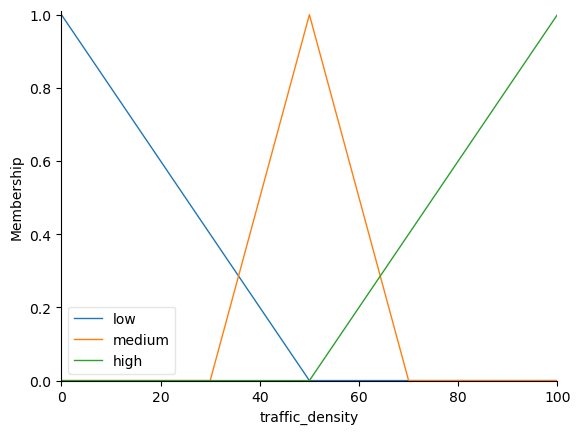

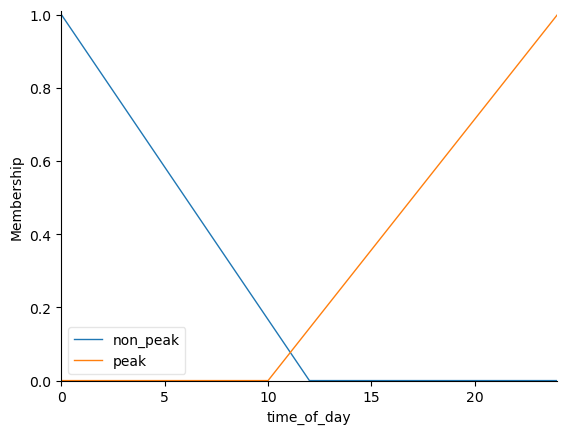

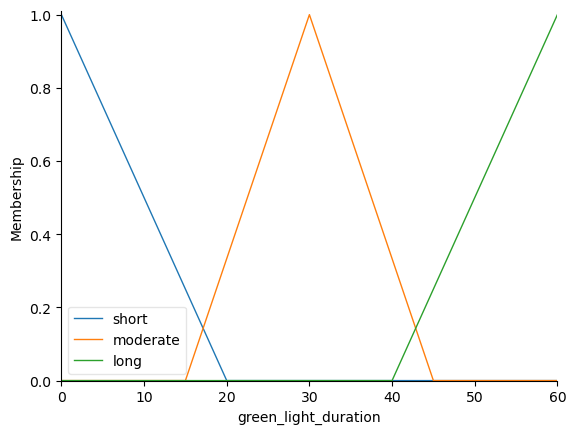

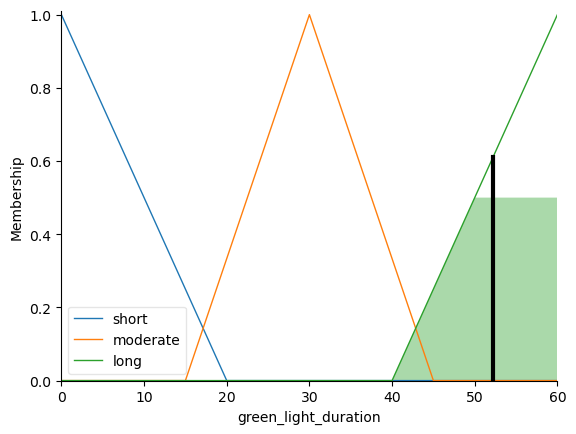

Prachi Mistry - 53004230021


In [18]:
#Practical 5 - Design a Fuzzy based application using Python - traffic problem

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
# Define fuzzy variables for traffic density, time of day, and green light duration
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1),'traffic_density')
time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), 'time_of_day')
green_light_duration = ctrl.Consequent(np.arange(0, 61, 1),'green_light_duration')
# Define membership functions for traffic density (low, medium,high)
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 50])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [30,50, 70])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [50, 100,100])
# Define membership functions for time of day (non-peak, peak)
time_of_day['non_peak'] = fuzz.trimf(time_of_day.universe, [0, 0,12])
time_of_day['peak'] = fuzz.trimf(time_of_day.universe, [10, 24, 24])
# Define membership functions for green light duration (short,moderate, long)
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [0, 0, 20])
green_light_duration['moderate'] = fuzz.trimf(green_light_duration.universe, [15, 30, 45])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [40, 60, 60])
# Visualize the membership functions
traffic_density.view()
time_of_day.view()
green_light_duration.view()
# Define the rules for the fuzzy system
rule1 = ctrl.Rule(traffic_density['low'] & time_of_day['non_peak'],green_light_duration['short'])
rule2 = ctrl.Rule(traffic_density['low'] & time_of_day['peak'],green_light_duration['moderate'])
rule3 = ctrl.Rule(traffic_density['medium'] & time_of_day['non_peak'], green_light_duration['moderate'])
rule4 = ctrl.Rule(traffic_density['medium'] & time_of_day['peak'],green_light_duration['long'])
rule5 = ctrl.Rule(traffic_density['high'] & time_of_day['non_peak'],green_light_duration['long'])
rule6 = ctrl.Rule(traffic_density['high'] & time_of_day['peak'],green_light_duration['long'])
# Control system
green_light_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5, rule6])
green_light_sim = ctrl.ControlSystemSimulation(green_light_ctrl)
# Simulate the system for some input values (traffic density and timeof day)
green_light_sim.input['traffic_density'] = 75 # High traffic
green_light_sim.input['time_of_day'] = 18 # Peak hours
# Compute the output based on the input values
green_light_sim.compute()
# Print and visualize the output
print(f"Recommended Green Light Duration:{green_light_sim.output['green_light_duration']} seconds")
green_light_duration.view(sim=green_light_sim)
# Show the plots
plt.show()
print("Prachi Mistry - 53004230021")

Enter temprature:5
Given the temprature of 5°c, the fan speed should be: 18.06%


C:\Users\Home\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


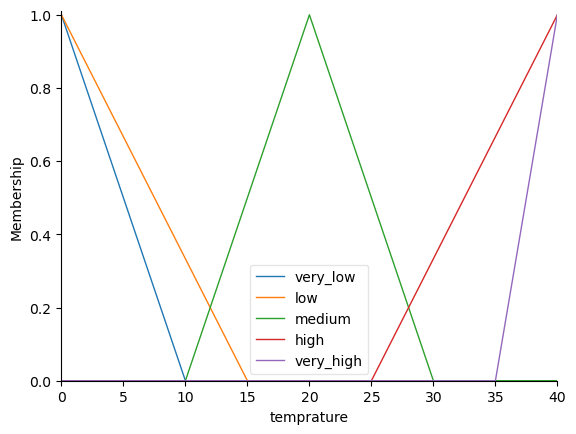

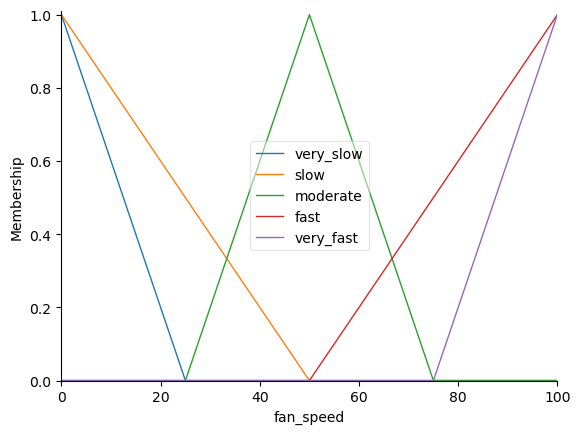

In [1]:
#Practical 5 - Design a Fuzzy based application using Python - fan speed / temprature problem

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#step 1: Define the fuzzy varibales
temprature=ctrl.Antecedent(np.arange(0,41,1), 'temprature')
fan_speed = ctrl.Consequent(np.arange(0,101,1), 'fan_speed')

temprature['very_low'] = fuzz.trimf(temprature.universe, [0,0,10])
temprature['low'] = fuzz.trimf(temprature.universe, [0,0,15])
temprature['medium'] = fuzz.trimf(temprature.universe, [10,20,30])
temprature['high'] = fuzz.trimf(temprature.universe, [25,40,40])
temprature['very_high'] = fuzz.trimf(temprature.universe, [35,40,40])

#Define membership
fan_speed['very_slow'] = fuzz.trimf(fan_speed.universe, [0,0,25])
fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0,0,50])
fan_speed['moderate'] = fuzz.trimf(fan_speed.universe, [25,50,75])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [50,100,100])
fan_speed['very_fast'] = fuzz.trimf(fan_speed.universe, [75,100,100])

#step3: define fuzzy rules
rule1 = ctrl.Rule(temprature['low'], fan_speed['slow'])
rule2 = ctrl.Rule(temprature['medium'], fan_speed['moderate'])
rule3 = ctrl.Rule(temprature['high'], fan_speed['fast'])

#Adding new rules
rule4 = ctrl.Rule(temprature['very_low'], fan_speed['very_slow'])
rule5 = ctrl.Rule(temprature['very_high'], fan_speed['very_fast'])

#step4 : create control system
fan_control_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
fan_simulation = ctrl.ControlSystemSimulation(fan_control_system)

#step5 : impute temp and compute fan speed
input_temprature = int(input("Enter temprature:"))
fan_simulation.input['temprature']=input_temprature

#Step 6
fan_simulation.compute()

#output
fan_speed_output = fan_simulation.output['fan_speed']
print(f"Given the temprature of {input_temprature}°c, the fan speed should be: {fan_speed_output:.2f}%")

#visualize
temprature.view()
fan_speed.view()


In [19]:
#prac 7 : NN feedforward backpropogation - XOR

import numpy as np
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Derivative of the Sigmoid Function for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)
# ANN class to simulate feedforward and backpropagation
class ArtificialNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.5):
        # Initialize weights randomly
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)  
        # Initialize biases randomly
        self.bias_hidden = np.random.rand(1, hidden_size)
        self.bias_output = np.random.rand(1, output_size)
        # Set the learning rate
        self.learning_rate = learning_rate
    # Feedforward process
    def feedforward(self, X):
        # Hidden layer activation
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        # Output layer activation
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        return self.output
    # Backpropagation process
    def backpropagation(self, X, y):
        # Error at the output layer
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)
        # Error at the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        # Update the weights and biases using the deltas
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
    # Train the neural network
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Feedforward
            self.feedforward(X)
            # Backpropagation
            self.backpropagation(X, y)
            # Print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y - self.output))
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}')
# Example usage
if __name__ == "__main__":
    # Input dataset (XOR problem)
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    # Output dataset (XOR output)
    y = np.array([[0],
                  [1],
                  [1],
                  [0]])
    # Parameters
    input_size = X.shape[1]  # 2 features in input
    hidden_size = 2          # 2 neurons in hidden layer
    output_size = 1          # 1 output neuron (binary classification)
    # Create the neural network
    ann = ArtificialNeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.5)
    # Train the neural network
    ann.train(X, y, epochs=10000)
    # Test the neural network
    output = ann.feedforward(X)
    print("\nPredicted Output after training:")
    print(output)
    print("Prachi Mistry - 53004230021")

Epoch 100/10000, Loss: 0.248978
Epoch 200/10000, Loss: 0.247411
Epoch 300/10000, Loss: 0.243201
Epoch 400/10000, Loss: 0.231770
Epoch 500/10000, Loss: 0.209077
Epoch 600/10000, Loss: 0.184625
Epoch 700/10000, Loss: 0.157143
Epoch 800/10000, Loss: 0.103775
Epoch 900/10000, Loss: 0.049764
Epoch 1000/10000, Loss: 0.026066
Epoch 1100/10000, Loss: 0.016276
Epoch 1200/10000, Loss: 0.011441
Epoch 1300/10000, Loss: 0.008675
Epoch 1400/10000, Loss: 0.006920
Epoch 1500/10000, Loss: 0.005721
Epoch 1600/10000, Loss: 0.004857
Epoch 1700/10000, Loss: 0.004208
Epoch 1800/10000, Loss: 0.003704
Epoch 1900/10000, Loss: 0.003302
Epoch 2000/10000, Loss: 0.002976
Epoch 2100/10000, Loss: 0.002705
Epoch 2200/10000, Loss: 0.002478
Epoch 2300/10000, Loss: 0.002284
Epoch 2400/10000, Loss: 0.002117
Epoch 2500/10000, Loss: 0.001972
Epoch 2600/10000, Loss: 0.001845
Epoch 2700/10000, Loss: 0.001733
Epoch 2800/10000, Loss: 0.001633
Epoch 2900/10000, Loss: 0.001543
Epoch 3000/10000, Loss: 0.001463
Epoch 3100/10000, L

In [8]:
#practical 6 - intelligent agents

class MathTutor:
    def __init__(self):
        self.operations = {
            '+': lambda a, b: a + b,
            '-': lambda a, b: a - b,
            '*': lambda a, b: a * b,
            '/': lambda a, b: a / b,
        }
    def explain_operation(self, operator):
        explanation = {
            '+': "Addition adds two numbers together.",
            '-': "Subtraction subtracts the second number from the first.",
            '*': "Multiplication gives the product of two numbers.",
            '/': "Division divides the first number by the second.",
        }
        return explanation.get(operator, "Invalid operation.")
    def perform_operation(self, operator, a, b):
        if operator in self.operations:
            return self.operations[operator](a, b)
        else:
            return None
if __name__ == "__main__":
    tutor = MathTutor()
    # Example usage:
    operator = '+'
    a, b = 10, 5
    print(tutor.explain_operation(operator))
    result = tutor.perform_operation(operator, a, b)
    print(f"Result of {a} {operator} {b} = {result}")

Addition adds two numbers together.
Result of 10 + 5 = 15


In [20]:
class MathTutor:
    def __init__(self):
        self.operations = {
            '+': lambda a, b: a + b,
            '-': lambda a, b: a - b,
            '*': lambda a, b: a * b,
            '/': lambda a, b: a / b,
        }
    def explain_operation(self, operator):
        explanation = {
            '+': "Addition adds two numbers together.",
            '-': "Subtraction subtracts the second number from the first.",
            '*': "Multiplication gives the product of two numbers.",
            '/': "Division divides the first number by the second.",
        }
        return explanation.get(operator, "Invalid operation.")
    def perform_operation(self, operator, a, b):
        if operator in self.operations:
            return self.operations[operator](a, b)
        else:
            return None
if __name__ == "__main__":
    tutor = MathTutor()
    # Get user input for the operator
    operator = input("Enter an operator (+, -, *, /): ").strip()
    # Get user input for the numbers
    try:
        a = float(input("Enter the first number: ").strip())
        b = float(input("Enter the second number: ").strip())
        # Explain the operation
        explanation = tutor.explain_operation(operator)
        print(explanation)
        # Perform the operation
        result = tutor.perform_operation(operator, a, b)
        if result is not None:
            print(f"Result of {a} {operator} {b} = {result}")
        else:
            print("Invalid operation.")
    except ValueError:
        print("Please enter valid numbers.")
    print("Prachi Mistry - 53004230021")

Enter an operator (+, -, *, /): *
Enter the first number: 2
Enter the second number: 3
Multiplication gives the product of two numbers.
Result of 2.0 * 3.0 = 6.0
Prachi Mistry - 53004230021


In [1]:
#simplified 

operations = {
            '+': lambda a, b: a + b,
            '-': lambda a, b: a - b,
            '*': lambda a, b: a * b,
            '/': lambda a, b: a / b,
            }

def perform_operation(operator, a, b):
        if operator in operations:
            return operations[operator](a, b)
        else:
            return None

operator = input("Enter an operator (+, -, *, /): ")
a = float(input("Enter the first number: "))
b = float(input("Enter the second number: "))
result = perform_operation(operator, a, b)
print("Result of",a,operator,b, "=",result)

Enter an operator (+, -, *, /): +
Enter the first number: 2
Enter the second number: 3
Result of 2.0 + 3.0 = 5.0


In [21]:
#prcatical 8 - Genetic Algorithm to Solve a Simple String Matching Problem

import random
import string
# Genetic Algorithm parameters
target_string = "HELLO"
population_size = 50  # Increased population size
mutation_rate = 0.01
generations = 200  # Increased generations for more evolution
# Fitness function: number of characters matching the target
def fitness(individual):
    return sum(1 for a, b in zip(individual, target_string) if a == b)
# Create initial population (random strings)
def create_population(size):
    return [''.join(random.choices(string.ascii_uppercase, k=len(target_string))) for _ in range(size)]
# Select parents (tournament selection)
def select_parents(population):
    tournament = random.sample(population, 5)  # Select 5 individuals instead of 3 for better diversity
    return max(tournament, key=fitness)
# Crossover (single-point crossover)
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    return parent1[:crossover_point] + parent2[crossover_point:]
# Mutation (random character mutation)
def mutate(individual):
    individual = list(individual)
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.choice(string.ascii_uppercase)
    return ''.join(individual)
# Main genetic algorithm loop
population = create_population(population_size)
for generation in range(generations):
    best_individual = max(population, key=fitness)
    print(f"Generation {generation}: Best individual: {best_individual}, Fitness: {fitness(best_individual)}")   
    if fitness(best_individual) == len(target_string):  # Stop early if the optimal solution is found
        break  
    # Create new generation
    new_population = []
    for _ in range(population_size):
        parent1 = select_parents(population)
        parent2 = select_parents(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)  
    population = new_population
# Best individual in the final population
best_individual = max(population, key=fitness)
print(f"Best individual: {best_individual}, Fitness: {fitness(best_individual)}")
print("Prachi Mistry - 53004230021")


Generation 0: Best individual: JZOLV, Fitness: 1
Generation 1: Best individual: ETLRY, Fitness: 1
Generation 2: Best individual: AFHLV, Fitness: 1
Generation 3: Best individual: ETLLV, Fitness: 2
Generation 4: Best individual: MKLLE, Fitness: 2
Generation 5: Best individual: CZLLV, Fitness: 2
Generation 6: Best individual: ATLLC, Fitness: 2
Generation 7: Best individual: MKLLV, Fitness: 2
Generation 8: Best individual: ETLLV, Fitness: 2
Generation 9: Best individual: MKLLC, Fitness: 2
Generation 10: Best individual: DTLLV, Fitness: 2
Generation 11: Best individual: MKLLC, Fitness: 2
Generation 12: Best individual: DTLLE, Fitness: 2
Generation 13: Best individual: DTLLC, Fitness: 2
Generation 14: Best individual: DTLLE, Fitness: 2
Generation 15: Best individual: DTLLA, Fitness: 2
Generation 16: Best individual: MTLLE, Fitness: 2
Generation 17: Best individual: DTLLE, Fitness: 2
Generation 18: Best individual: MTLLA, Fitness: 2
Generation 19: Best individual: QTLLV, Fitness: 2
Generation

In [22]:
#Practical 9 - language parser

class SimpleParser:
    def __init__(self, expr):
        self.tokens = expr.replace('(', ' ( ').replace(')', ' ) ').split()
        self.pos = 0
    def parse(self):
        return self.expr()
    def advance(self):
        self.pos += 1
    def current_token(self):
        return self.tokens[self.pos] if self.pos < len(self.tokens) else None
    def expr(self):
        result = self.term()
        while self.current_token() in ('+', '-'):
            if self.current_token() == '+':
                self.advance()
                result += self.term()
            elif self.current_token() == '-':
                self.advance()
                result -= self.term()
        return result
    def term(self):
        result = self.factor()
        while self.current_token() in ('*', '/'):
            if self.current_token() == '*':
                self.advance()
                result *= self.factor()
            elif self.current_token() == '/':
                self.advance()
                result /= self.factor()
        return result
    def factor(self):
        token = self.current_token()
        if token.isdigit():
            self.advance()
            return int(token)
        elif token == '(':
            self.advance()
            result = self.expr()
            self.advance()  # skip ')'
            return result
        raise ValueError("Invalid syntax")
if __name__ == "__main__":
    expr = "(2 + 5) * 3"
    parser = SimpleParser(expr)
    result = parser.parse()
    print(f"Result of '{expr}' is {result}")
    print("Prachi Mistry - 53004230021")

Result of '(2 + 5) * 3' is 21
Prachi Mistry - 53004230021


In [23]:
#practical 10 - semantic network

class SemanticNetwork:
    def __init__(self):
        self.network = {}
    def add_concept(self, concept):
        if concept not in self.network:
            self.network[concept] = {'is_a': [], 'has_a': []}
    def add_relation(self, relation, concept1, concept2):
        self.add_concept(concept1)
        self.add_concept(concept2)
        self.network[concept1][relation].append(concept2)
    def get_relations(self, concept):
        return self.network.get(concept, {})
    def display_network(self):
        for concept, relations in self.network.items():
            print(f"Concept: {concept}")
            for relation, related_concepts in relations.items():
                for related_concept in related_concepts:
                    print(f"  {relation} -> {related_concept}")
if __name__ == "__main__":
    sn = SemanticNetwork()
    # Adding concepts and relations
    sn.add_concept("Animal")
    sn.add_concept("Bird")
    sn.add_concept("Mammal")
    sn.add_concept("Penguin")
    sn.add_concept("Canary")
    sn.add_relation("is_a", "Bird", "Animal")
    sn.add_relation("is_a", "Mammal", "Animal")
    sn.add_relation("is_a", "Penguin", "Bird")
    sn.add_relation("is_a", "Canary", "Bird")
    sn.add_relation("has_a", "Bird", "Wings")
    sn.add_relation("has_a", "Canary", "Yellow_Feathers")
    # Displaying the network
    sn.display_network()
    print("Prachi Mistry - 53004230021")


Concept: Animal
Concept: Bird
  is_a -> Animal
  has_a -> Wings
Concept: Mammal
  is_a -> Animal
Concept: Penguin
  is_a -> Bird
Concept: Canary
  is_a -> Bird
  has_a -> Yellow_Feathers
Concept: Wings
Concept: Yellow_Feathers
Prachi Mistry - 53004230021
